# Exercise SKLearn K-Means Clustering


In [39]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [40]:
# Prepare the dataset into dataframe
df = pd.read_csv("../../../data/Mall_Customers.csv")

In [41]:
# Show the first 3 rows of the dataset
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [42]:
# Rename the attributes name

df = df.rename(
    columns={
        "Gender": "gender",
        "Age": "age",
        "Annual Income (k$)": "annual_income",
        "Spending Score (1-100)": "spending_score",
    }
)

In [43]:
# Change the categorical attribute from feature gender into numeric
df["gender"].replace(["Female", "Male"], [0, 1], inplace=True)

In [44]:
# Show the first 3 rows from the data after preprocessing
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [45]:
# Drop column CustomerID and gender since they are not relevant to k-means clustering
X = df.drop(columns=["CustomerID", "gender"], axis=1)

In [46]:
# Create a list that contains inertia number
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

Text(0, 0.5, 'Inertia')

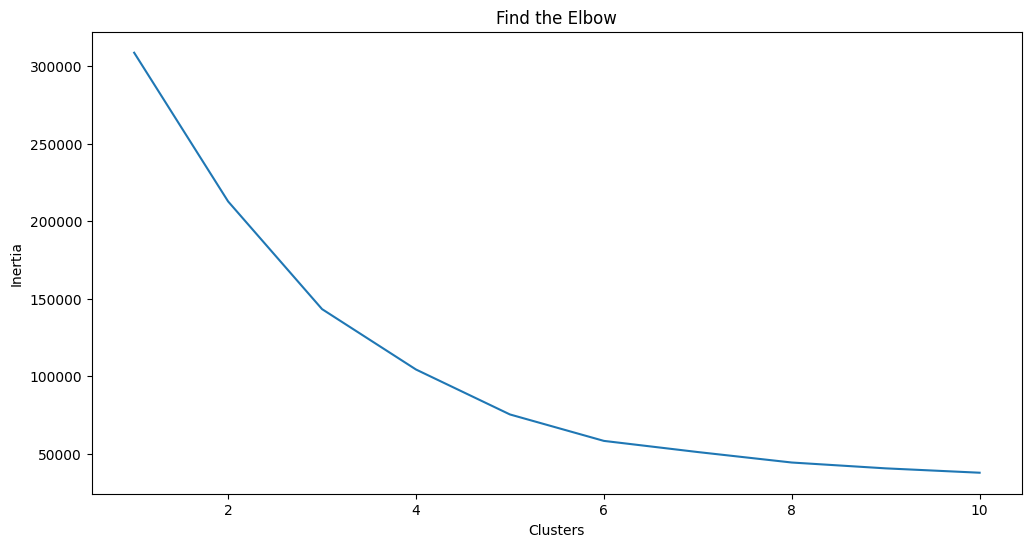

In [47]:
# Visualize the inertia number
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title("Find the Elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")

In [48]:
# Since after the value of 5 in clusters tehre is no significant decreasing number for inertia, the K value used is 5

# Create object KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Add label column in the dataset
X["Labels"] = km5.labels_

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


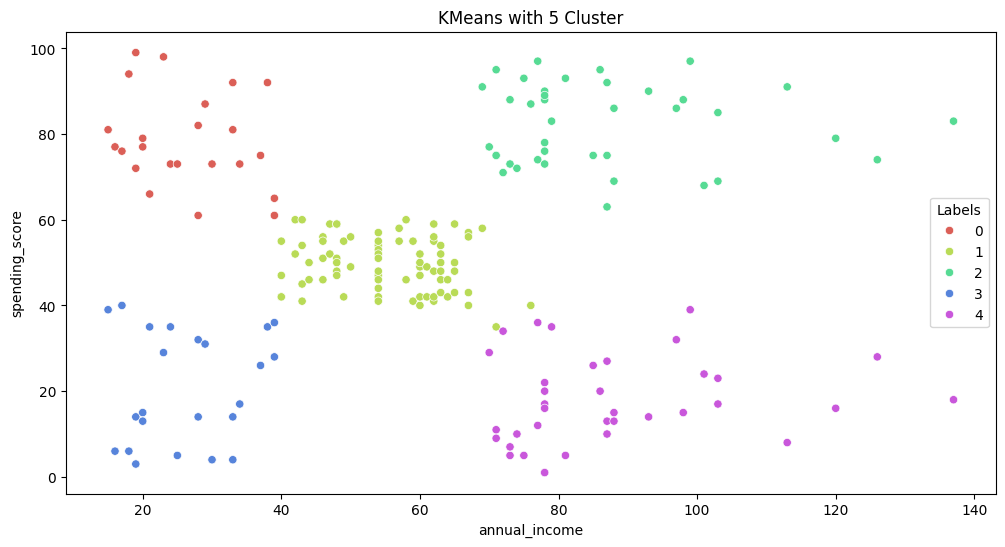

In [50]:
# Visualize the KMeans with 5 cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=X["annual_income"],
    y=X["spending_score"],
    hue=X["Labels"],
    palette=sns.color_palette("hls", 5),
)
plt.title("KMeans with 5 Cluster")
plt.show()